<h1 style="text-align: center;">ENGR350</h1>
<h1 style="text-align: center;">Introduction Data Science with Python Term - Project</h1>
<h3 style="text-align: center;"><strong>Hotel Booking ML Models and Predictions</strong></h3>
<h2 style="text-align: center;">Banu Yobaş</h2>
<h3 style="text-align: center;">Fırat Tamur - Kutay Eroğlu</h3>
<h3 style="text-align: center;">May 21, 2020</h3>

In [1]:
# importing data libraries

import numpy as np
import pandas as pd

# importing visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing models from sklearn and tensorflow.keras

# sklearn classification algorithms
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix

# tensorflow.keras Sequential model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


### Read Data:

In [3]:
data = pd.read_csv('../Data/hotel_bookings_cleaned.csv')

In [4]:
data.shape

(118894, 283)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118894 entries, 0 to 118893
Columns: 283 entries, is_canceled to customer_type_Transient-Party
dtypes: float64(1), int64(282)
memory usage: 256.7 MB


In [6]:
data.describe()

# we have different range of values.
# most of our columns consist dummy variables 

,is_canceled,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,lead_time_60,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
count,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,...,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000,118894.000000
mean,0.371348,27.166737,0.928878,2.502111,0.032012,2.330833,101.958626,0.061483,0.571686,1.335803,...,0.002347,0.000008,0.000017,0.876074,0.122563,0.001363,0.034274,0.004794,0.750013,0.210919
std,0.483167,13.589887,0.996181,1.900065,0.176032,17.630744,48.091689,0.240216,0.792686,1.717330,...,0.048385,0.002900,0.004101,0.329498,0.327936,0.036888,0.181933,0.069074,0.433007,0.407963
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,16.000000,0.000000,1.000000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,28.000000,1.000000,2.000000,0.000000,0.000000,95.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,38.000000,2.000000,3.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,53.000000,16.000000,41.000000,1.000000,391.000000,510.000000,1.000000,5.000000,12.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
X = data.drop(['is_canceled'], axis=1).values
y = data['is_canceled'].values

In [8]:
X.shape, y.shape

((118894, 282), (118894,))

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[:1000], y[:1000], test_size=0.1)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((900, 282), (100, 282), (900,), (100,))

### Standardize Data:

In [11]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [12]:
pd.DataFrame(X_train).describe() # result of standardization

,0,1,2,3,4,5,6,7,8,9,...,272,273,274,275,276,277,278,279,280,281
count,9.000000e+02,9.000000e+02,9.000000e+02,900.0,900.0,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02,...,900.0,900.0,900.0,900.0,900.0,900.0,9.000000e+02,9.000000e+02,9.000000e+02,9.000000e+02
mean,-2.565849e-16,-9.868649e-18,1.006602e-16,0.0,0.0,-1.748725e-15,5.822503e-17,5.625130e-17,-5.921189e-17,1.282924e-16,...,0.0,0.0,0.0,0.0,0.0,0.0,7.894919e-18,2.368476e-17,-1.578984e-16,-7.894919e-18
std,1.000556e+00,1.000556e+00,1.000556e+00,0.0,0.0,1.000556e+00,1.000556e+00,1.000556e+00,1.000556e+00,1.000556e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000556e+00,1.000556e+00,1.000556e+00,1.000556e+00
min,-1.539136e+00,-1.222683e+00,-1.621191e+00,0.0,0.0,-2.874290e+00,-3.978708e-01,-8.832530e-01,-5.614401e-01,-1.606588e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,-2.320866e-01,-4.719292e-02,-2.666104e+00,-2.743516e-01
25%,-9.185167e-01,-1.222683e+00,-6.807644e-01,0.0,0.0,-5.828983e-01,-3.978708e-01,-8.832530e-01,-5.614401e-01,-9.313935e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,-2.320866e-01,-4.719292e-02,3.750792e-01,-2.743516e-01
50%,-2.978973e-01,-2.901282e-01,-2.105511e-01,0.0,0.0,-9.892725e-02,-3.978708e-01,2.475119e-01,-5.614401e-01,-2.561989e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,-2.320866e-01,-4.719292e-02,3.750792e-01,-2.743516e-01
75%,9.433415e-01,6.424267e-01,7.298756e-01,0.0,0.0,5.826453e-01,-3.978708e-01,2.475119e-01,5.466654e-01,7.565931e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,-2.320866e-01,-4.719292e-02,3.750792e-01,-2.743516e-01
max,2.184580e+00,4.372646e+00,5.432009e+00,0.0,0.0,3.248739e+00,2.513379e+00,3.639806e+00,1.273583e+01,5.482956e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,4.308737e+00,2.118962e+01,3.750792e-01,3.644957e+00


### Create Models and Fit with KFold

In [41]:
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')

kfold = StratifiedKFold(n_splits=10)

# Modeling with different algorithms

state = 42
classifiers = list()

classifiers.append(SVC(random_state=state))
classifiers.append(DecisionTreeClassifier(random_state=state))
classifiers.append(RandomForestClassifier(random_state=state))
classifiers.append(GradientBoostingClassifier(random_state=state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []

for i in tqdm(range(len(classifiers))):
    cv_results.append(cross_val_score(classifiers[i], X_train, y_train, scoring='accuracy', cv = kfold))


[0.87777778 0.86666667 0.76666667 0.8        0.84444444 0.83333333
 0.84444444 0.81111111 0.84444444 0.82222222]
[0.82222222 0.78888889 0.68888889 0.78888889 0.83333333 0.76666667
 0.86666667 0.76666667 0.78888889 0.82222222]
[0.86666667 0.83333333 0.74444444 0.83333333 0.86666667 0.81111111
 0.87777778 0.87777778 0.86666667 0.84444444]
[0.81111111 0.86666667 0.74444444 0.83333333 0.85555556 0.83333333
 0.9        0.8        0.81111111 0.84444444]
[0.75555556 0.81111111 0.71111111 0.73333333 0.73333333 0.66666667
 0.81111111 0.75555556 0.71111111 0.75555556]
[0.82222222 0.9        0.77777778 0.85555556 0.86666667 0.85555556
 0.9        0.84444444 0.82222222 0.82222222]
[0.82222222 0.78888889 0.76666667 0.83333333 0.81111111 0.81111111
 0.81111111 0.8        0.83333333 0.84444444]



### Keras Sequential Model:

In [45]:
keras_val_scores = list()

for train, test in tqdm(kfold.split(X_train, y_train)):

    model = Sequential()

    model.add(Dense(8, input_shape=(X.shape[1],), activation="relu"))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(8, activation="relu"))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(X_train[train], y_train[train], epochs=150, batch_size=10, verbose=0)
    scores = model.evaluate(X_train[test], y_train[test], verbose=0)
    
    print(scores[1], end=" ")
    keras_val_scores.append(scores[1])

0.84444445 0.84444445 0.7777778 0.8333333 0.8111111 0.8 0.8111111 0.8333333 0.84444445 0.8333333 


In [46]:
cv_results.append(np.array(keras_val_scores))

In [47]:
cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

    
cv_df = pd.DataFrame({"Algorithm": ["SVC","DecisionTree",
                                    "RandomForest","GradientBoosting",
                                     "KNeighboors","LogisticRegression",
                                     "LinearDiscriminantAnalysis", "Keras"],
                        "CVMean": cv_means,
                        "CVError": cv_std})

In [48]:
cv_df

,Algorithm,CVMean,CVError
0,SVC,0.831111,0.030952
1,DecisionTree,0.793333,0.045866
2,RandomForest,0.842222,0.038746
3,GradientBoosting,0.830000,0.040077
4,KNeighboors,0.744444,0.042164
5,LogisticRegression,0.846667,0.035763
6,LinearDiscriminantAnalysis,0.812222,0.021915
7,Keras,0.823333,0.021344


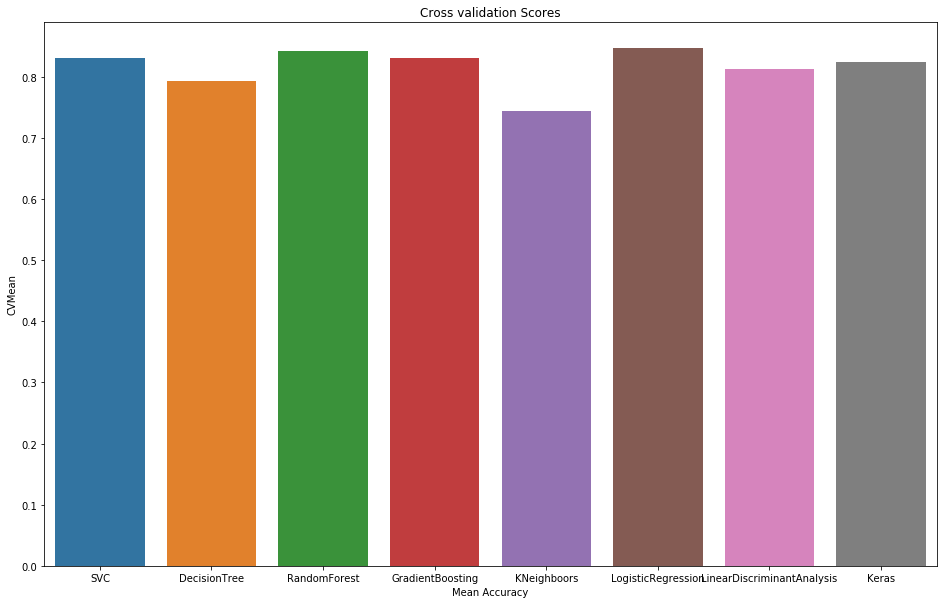

In [49]:
plt.figure(figsize=(16, 10))

g = sns.barplot(x='Algorithm', y='CVMean', data=cv_df)

g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation Scores")